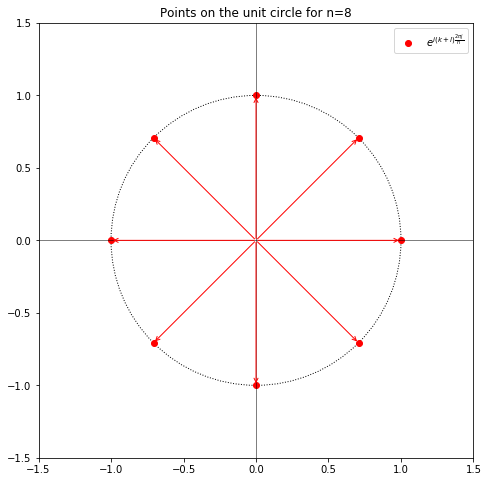

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set the number of points
n = 8
k_plus_l = 3  # k+l must be non-zero and not a multiple of n for the demonstration

# Generate the points on the unit circle for e^(i*(k+l)*2*pi*j/n)
points = np.exp(1j * (k_plus_l) * 2 * np.pi * np.arange(n) / n)

# Plot the unit circle
fig, ax = plt.subplots(figsize=(8, 8))
circle = plt.Circle((0, 0), 1, fill=False, color='black', linestyle='dotted')
ax.add_artist(circle)

# Plot the points on the unit circle
ax.plot(points.real, points.imag, 'ro', label=r'$e^{i(k+l)\frac{2\pi j}{n}}$')

# Draw vectors to the points
for point in points:
    ax.annotate('', xy=(point.real, point.imag), xytext=(0, 0),
                arrowprops=dict(arrowstyle="->", color='red'))

# Set the limits and labels
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_aspect('equal', 'box')
ax.set_title('Points on the unit circle for n=8')
ax.legend()

# Show the plot
plt.show()


In [3]:
from math import pi
import numpy as np

def f(x):
    return np.exp(np.sin(2*x))

def generatedata(n,f):
    dataxs = 2*pi*np.arange(n)/n
    datays = f(dataxs)
    return dataxs, datays

def computeparams(dataxs,datays):
    n = dataxs.size
    m = n//2
    aparams = np.zeros(m+1)
    bparams = np.zeros(m-1)
    
    for k in range(m+1):
        aparams[k] = datays@np.cos(k*dataxs)/m
    for k in range(1,m):
        bparams[k-1] = datays@np.sin(k*dataxs)/m
    return aparams, bparams

def triginterp(aparams,bparams,x):
    n = aparams.size + bparams.size
    m = n//2
    val = 0.5*(aparams[0] + aparams[-1]*np.cos(m*x))
    for k in range(1,m):
        val += aparams[k]*np.cos(k*x)
        val += bparams[k-1]*np.sin(k*x)
    return val

if __name__ == '__main__':
    dataxs, datays = generatedata(8, f)
    aparams, bparams = computeparams(dataxs, datays)
    x = 0.3; pofx = triginterp(aparams, bparams, x)
    print(x,pofx,f(0.3))


0.3 1.8367140864577463 1.7588188457669927


In [6]:
from math import pi
import numpy as np

def f(x):
    return np.exp(np.sin(2*x))

def generatedata(n,f):
    dataxs = 2*pi*np.arange(n)/n
    datays = f(dataxs)
    return dataxs, datays

def fft(ys):
    n = ys.size
    m = n//2
    if n==1:
        ytils = ys
    else:
        evens = fft(ys[::2])
        print('1ding')
        odds = fft(ys[1::2])
        print('2ding')
        coeffs = np.exp(-2*pi*np.arange(m)*1j/n)
        print(m)
        print(coeffs)
        print('3ding')
        first = evens + coeffs*odds
        print('4ding')
        second = evens - coeffs*odds
        print('5ding')
        ytils = np.concatenate((first, second))
        print('6ding')
    return ytils
y=np.array([1,2,3,4,5,6,6,7])
print(fft(y))

1ding
2ding
1
[1.+0.j]
3ding
4ding
5ding
6ding
1ding
1ding
2ding
1
[1.+0.j]
3ding
4ding
5ding
6ding
2ding
2
[1.000000e+00+0.j 6.123234e-17-1.j]
3ding
4ding
5ding
6ding
1ding
1ding
2ding
1
[1.+0.j]
3ding
4ding
5ding
6ding
1ding
1ding
2ding
1
[1.+0.j]
3ding
4ding
5ding
6ding
2ding
2
[1.000000e+00+0.j 6.123234e-17-1.j]
3ding
4ding
5ding
6ding
2ding
4
[ 1.00000000e+00+0.j          7.07106781e-01-0.70710678j
  6.12323400e-17-1.j         -7.07106781e-01-0.70710678j]
3ding
4ding
5ding
6ding
[34.        +0.j         -4.70710678+7.94974747j -3.        +3.j
 -3.29289322+1.94974747j -4.        +0.j         -3.29289322-1.94974747j
 -3.        -3.j         -4.70710678-7.94974747j]


In [8]:
# from triginterp import f, generatedata
from math import pi
import numpy as np

def f(x):
    return np.exp(np.sin(2*x))

def generatedata(n,f):
    dataxs = 2*pi*np.arange(n)/n
    datays = f(dataxs)
    return dataxs, datays

def fft(ys):
    n = ys.size
    m = n//2
    if n==1:
        ytils = ys
    else:
        evens = fft(ys[::2])
        print('1ding')
        odds = fft(ys[1::2])
        print('2ding')
        coeffs = np.exp(-2*pi*np.arange(m)*1j/n)
        print('3ding')
        first = evens + coeffs*odds
        print('4ding')
        second = evens - coeffs*odds
        print('5ding')
        ytils = np.concatenate((first, second))
        print('6ding')
    return ytils

# def fftinterp(ytils,x):
#     n = ytils.size
#     m = n//2
#     val = ytils[:m]@np.exp(np.arange(m)*x*1j)
#     val += ytils[m]*np.cos(m*x)
#     val += ytils[m+1:]@np.exp(np.arange(-m+1,0)*x*1j)
#     return val/n
y=np.array([1,2,3,4])
print(fft(y))
# if __name__ == '__main__':
#     n = 4
#     dataxs, datays = generatedata(n, f)
#     ytils = fft(datays)
#     x = 0.3; pofx = fftinterp(ytils, x)
#     print(x,pofx.real)


1ding
2ding
3ding
4ding
5ding
6ding
1ding
1ding
2ding
3ding
4ding
5ding
6ding
2ding
3ding
4ding
5ding
6ding
[10.+0.j -2.+2.j -2.+0.j -2.-2.j]


In [2]:
import numpy as np

# Recursive FFT function
def recursive_fft(f):
    N = len(f)
    if N == 2:
        # Base case for the recursion: FFT of two points
        return [f[0] + f[1], f[0] - f[1]]
    else:
        # Split the list into even and odd indexed elements
        even = recursive_fft(f[::2])
        odd = recursive_fft(f[1::2])
        # Compute the twiddle factors
        twiddle_factors = np.exp(-2j * np.pi * np.arange(N // 2) / N)
        print(twiddle_factors)
        # Combine the results of even and odd recursively
        combined = [0] * N
        print(N)
        for n in range(N // 2):
            combined[n] = even[n] + twiddle_factors[n] * odd[n]
            combined[n + N // 2] = even[n] - twiddle_factors[n] * odd[n]
        return combined

# Example with 8 points
f_example = np.array([0, 1, 2, 3, 4, 5, 6, 7], dtype=complex)

# Perform FFT
fft_result_example = recursive_fft(f_example)
fft_result_example

4
4
8


[(28+0j),
 (-4+9.65685424949238j),
 (-4+4j),
 (-4+1.6568542494923797j),
 (-4+0j),
 (-4-1.6568542494923806j),
 (-3.9999999999999996-4j),
 (-3.9999999999999987-9.65685424949238j)]